In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("kidneyChronic.csv")

In [8]:
!pip install --use--upgrade pandas

  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.3
    Uninstalling pandas-1.1.3:
      Successfully uninstalled pandas-1.1.3


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\bansashi\\Anaconda3\\Lib\\site-packages\\~andas\\_libs\\algos.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [3]:
df = df.replace('\\t', '', regex=True).replace('?', method='bfill')

In [4]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res) 

In [5]:

features_to_encode = ['rbc', 'pc', 'pcc', 'dm', 'cad', 'appet', 'pe', 'ane', 'ba','htn']
for feature in features_to_encode:
    df = encode_and_bind(df, feature)




In [6]:
from sklearn.model_selection import train_test_split

X = df[['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'wbcc', 'rbcc', 'htn_no', 'htn_yes', 'rbc_abnormal', 'rbc_normal',
       'pc_abnormal', 'pc_normal', 'pcc_notpresent', 'pcc_present', 'dm_ yes',
       'dm_no', 'dm_yes', 'cad_no', 'cad_yes', 'appet_good', 'appet_poor',
       'pe_no', 'pe_yes', 'ane_no', 'ane_yes', 'ba_notpresent', 'ba_present']]  # Features
y = df['class']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [8]:
from sklearn.tree import DecisionTreeClassifier

#Create a Gaussian Classifier
clf = DecisionTreeClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [21]:
!pip install six

In [28]:
!pip install pydot

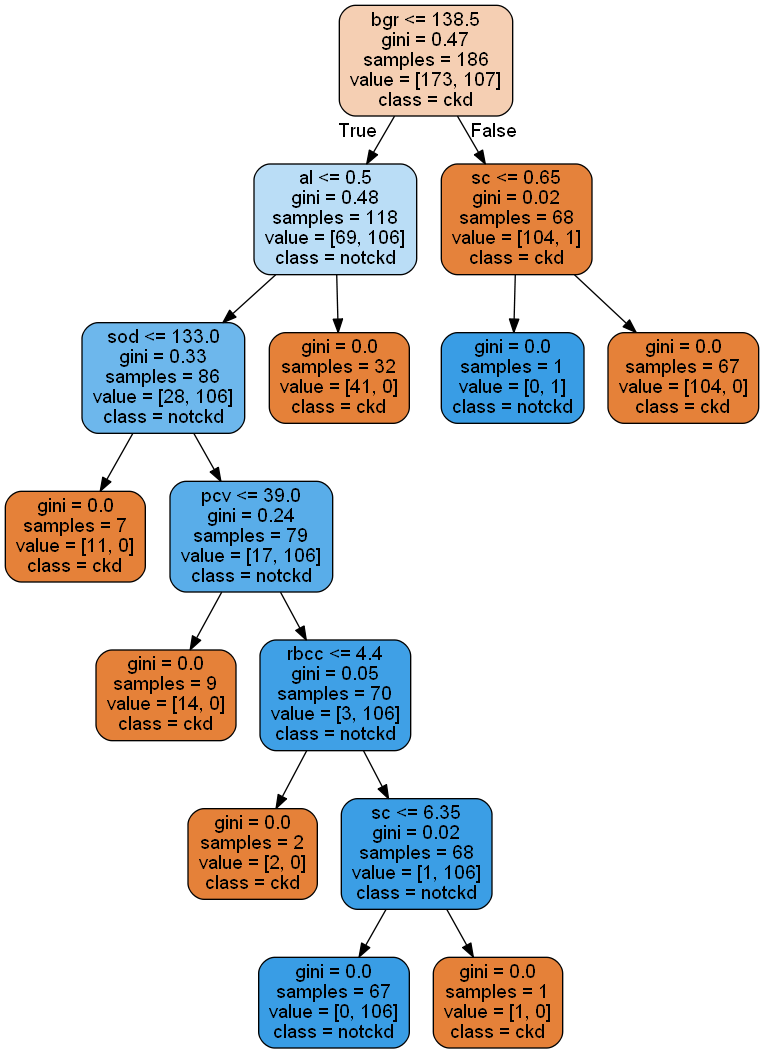

In [31]:
import pydot
from six import StringIO
from sklearn.tree import export_graphviz
dot_data = StringIO()
# Export as dot file
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X_train.columns,class_names=['0','1'])
(graph,) = pydot.graph_from_dot_file("tree.dot")
graph.write_png('tree.png')

from IPython.display import Image
Image(filename = 'tree.png')

In [49]:
#!pip install pydot

Text(0.5, 0, 'Relative Importance')

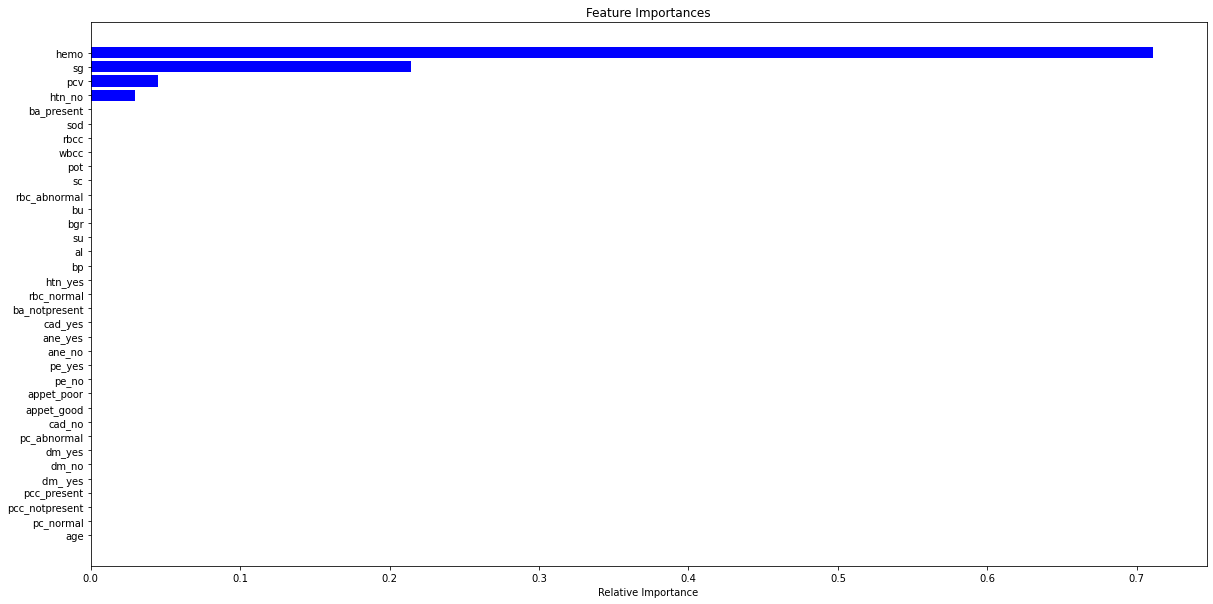

In [10]:

import numpy as np
import matplotlib.pyplot as plt
importances = clf.feature_importances_
indices = np.argsort(importances)
features = X_train.columns
plt.figure(figsize=(20,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [13]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [14]:
metrics.confusion_matrix(y_test, y_pred)

array([[75,  0],
       [ 0, 45]], dtype=int64)

In [15]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ckd       1.00      1.00      1.00        75
      notckd       1.00      1.00      1.00        45

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



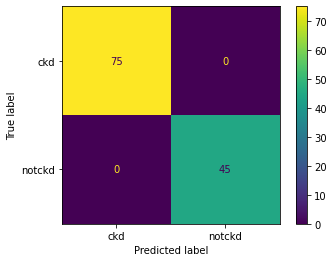

In [16]:
metrics.plot_confusion_matrix(clf, X_test, y_test)

In [33]:
#data validation
data = {"y_test": y_test.reset_index(), 
        "y_pred": pd.Series(y_pred, name='prediction')}
final_df = pd.concat(data, axis=1)

final_df[final_df.y_test['class'] != final_df.y_pred['prediction']]

Empty DataFrame
Columns: [(y_test, index), (y_test, class), (y_pred, prediction)]
Index: []

In [34]:
X_test.merge(final_df, left_index=True, right_index=True)

C:\Users\bansashi\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,appet_poor,pe_no,pe_yes,ane_no,ane_yes,ba_notpresent,ba_present,"(y_test, index)","(y_test, class)","(y_pred, prediction)"
73,56,100,1.015,2,0,129,107,6.7,132,4.4,...,0,0,1,0,1,1,0,332,notckd,notckd
44,54,80,1.01,3,0,207,77,6.3,134,4.8,...,1,0,1,1,0,1,0,15,ckd,ckd
106,50,90,1.015,1,4,89,118,6.1,127,4.4,...,0,0,1,0,1,1,0,336,notckd,notckd
91,56,70,1.015,4,1,210,26,1.7,136,3.8,...,0,1,0,1,0,1,0,170,ckd,ckd
102,17,60,1.01,0,0,92,32,2.1,141,4.2,...,0,1,0,1,0,1,0,242,ckd,ckd
49,60,70,1.01,2,0,144,72,3,142,4.3,...,1,1,0,0,1,1,0,78,ckd,ckd
32,61,90,1.01,1,1,159,39,1.5,133,4.9,...,1,1,0,1,0,1,0,302,notckd,notckd
14,68,80,1.01,3,2,157,90,4.1,130,6.4,...,1,0,1,1,0,0,1,280,notckd,notckd
3,48,70,1.005,4,0,117,56,3.8,111,2.5,...,1,0,1,0,1,1,0,106,ckd,ckd
42,47,100,1.01,0,0,204,29,1,139,4.2,...,0,1,0,0,1,1,0,17,ckd,ckd
